In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d parthplc/indian-dance-images

100% 227M/227M [00:13<00:00, 23.5MB/s]
100% 227M/227M [00:13<00:00, 18.1MB/s]


In [ ]:
!unzip '/content/indian-dance-images.zip'


Streaming output truncated to the last 5000 lines.
  inflating: dataset/train/bharatanatyam/bharatanatyam_original_126.jpg_8db9d822-10c1-4e9b-9de0-888f847889e0.jpg  
  inflating: dataset/train/bharatanatyam/bharatanatyam_original_126.jpg_9b65b5c9-ef60-42ca-8f44-e035e180c4aa.jpg  
  inflating: dataset/train/bharatanatyam/bharatanatyam_original_126.jpg_bc25ed63-7a71-43c2-a0e1-1e189f1bf101.jpg  
  inflating: dataset/train/bharatanatyam/bharatanatyam_original_126.jpg_c78abb10-9e20-48bb-a71f-eb83cd14bece.jpg  
  inflating: dataset/train/bharatanatyam/bharatanatyam_original_126.jpg_ce762451-9a54-4865-8ffa-c8b035618136.jpg  
  inflating: dataset/train/bharatanatyam/bharatanatyam_original_126.jpg_d3f08f3b-3327-4440-b1b6-a7af4c77afb7.jpg  
  inflating: dataset/train/bharatanatyam/bharatanatyam_original_126.jpg_dd2a40a0-7502-4327-98bf-dd3291ea2091.jpg  
  inflating: dataset/train/bharatanatyam/bharatanatyam_original_126.jpg_e30dd880-e4f4-4e50-8bea-45bbcf806681.jpg  
  inflating: dataset/train/bh

In [ ]:
train_directory = '/content/dataset/train'
test_directory = '/content/dataset/validation'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator( rescale=1. / 255,
       rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
    directory = train_directory,
    target_size = (224, 224),
    batch_size = 32,
    class_mode='categorical'
)

test_set = test_datagen.flow_from_directory(
    directory = test_directory,
    target_size = (224, 224),
    batch_size = 32,
    class_mode='categorical'
)

Found 5000 images belonging to 8 classes.
Found 364 images belonging to 8 classes.


In [ ]:
len(training_set), len(test_set)

(125, 12)

In [ ]:
import matplotlib.pyplot as plt

NameError: name 'sns' is not defined

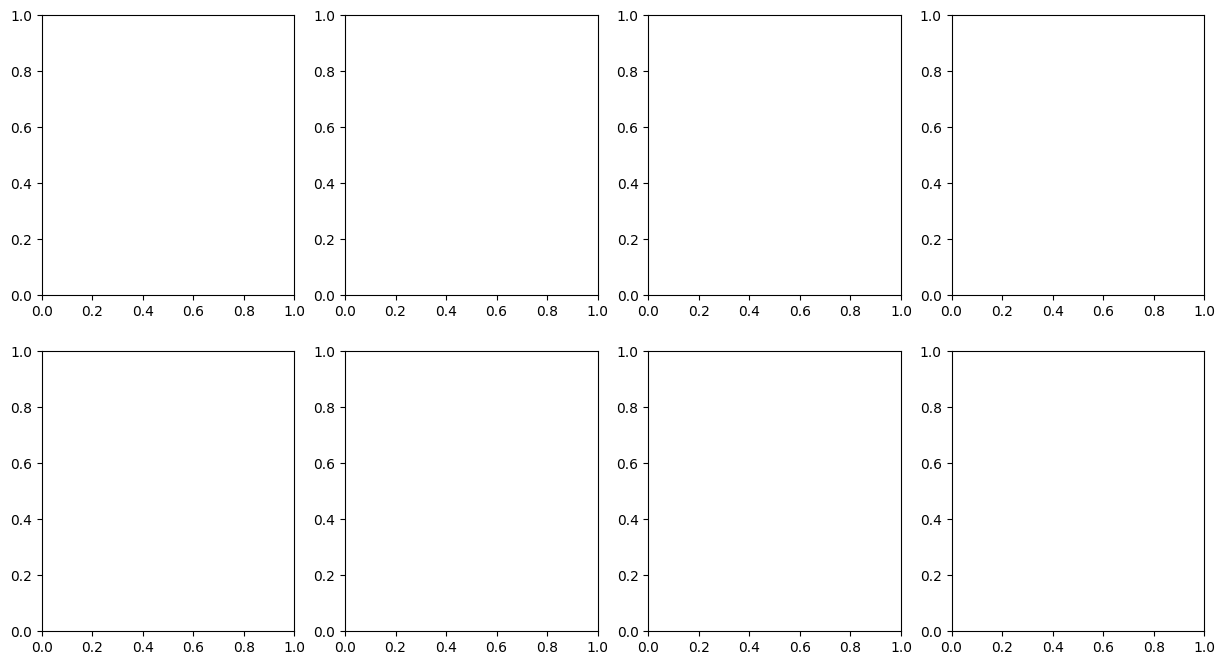

In [ ]:
data_dir='/content/dataset/train'
categories=['bharatanatyam', 'kathak', 'kathakali', 'kuchipudi', 'manipuri', 'mohiniyattam', 'odissi', 'sattriya']
fig,axes=plt.subplots(2,4,figsize=(15,8))
sns.set_style('whitegrid')

for i, category in enumerate(categories):
  img_path=os.path.join(data_dir,category,os.listdir(os.path.join(data_dir,category))[0])
  img=Image.open(img_path)
  ax=axes[i //4, i % 4]
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(category,fontsize=15)

plt.show()

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model

In [ ]:
vgg = VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
for layer in vgg.layers:
  print(layer)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:

output =Dense(8, activation = 'softmax')(x)

In [ ]:
#output = Dense(8,activation='softmax')(x)#

In [ ]:
vgg16 = Model(vgg.input,output)

In [ ]:
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    'best_vgg16.h5',  # file name to save the best model
    monitor='val_accuracy',  # metric to monitor
    save_best_only=True,  # save only the best model
    mode='max',  # mode can be 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # optional, set to 1 to see progress during training
)
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

# Assuming you have defined your VGG16 model as vgg16

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model (you may have already done this)
vgg16.compile(optimizer='Adam' , loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model with early stopping callback
vgg16.fit(training_set, validation_data=test_set, epochs=50, steps_per_epoch=len(training_set),
          validation_steps=len(test_set), callbacks=[early_stopping,checkpoint])

Epoch 1/50
157/157 [==============================] - ETA: 0s - loss: 0.8472 - accuracy: 0.7402
Epoch 1: val_accuracy improved from -inf to 0.94505, saving model to best_vgg16.h5
157/157 [==============================] - 89s 509ms/step - loss: 0.8472 - accuracy: 0.7402 - val_loss: 0.2125 - val_accuracy: 0.9451
Epoch 2/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


157/157 [==============================] - ETA: 0s - loss: 0.2520 - accuracy: 0.9308
Epoch 2: val_accuracy did not improve from 0.94505
157/157 [==============================] - 77s 492ms/step - loss: 0.2520 - accuracy: 0.9308 - val_loss: 0.1642 - val_accuracy: 0.9396
Epoch 3/50
157/157 [==============================] - ETA: 0s - loss: 0.1483 - accuracy: 0.9626
Epoch 3: val_accuracy improved from 0.94505 to 0.99451, saving model to best_vgg16.h5
157/157 [==============================] - 77s 489ms/step - loss: 0.1483 - accuracy: 0.9626 - val_loss: 0.0372 - val_accuracy: 0.9945
Epoch 4/50
157/157 [==============================] - ETA: 0s - loss: 0.1063 - accuracy: 0.9710
Epoch 4: val_accuracy did not improve from 0.99451
157/157 [==============================] - 77s 490ms/step - loss: 0.1063 - accuracy: 0.9710 - val_loss: 0.0540 - val_accuracy: 0.9835
Epoch 5/50
157/157 [==============================] - ETA: 0s - loss: 0.0815 - accuracy: 0.9774
Epoch 5: val_accuracy improved from 0

In [ ]:
vgg16.save('Vgg16%.h5')

In [ ]:
model=load_model('/content/best_vgg16.h5')

In [ ]:
from keras.models import load_model

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

index=['Bhartanatyam','Kathak','Kathakali','Kuchupudi','Manipuri','Mohiniyattam','Odissi','Sattriya']

In [ ]:
img=image.load_img(r'/content/dataset/validation/kuchipudi/377.jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
output=np.argmax(model.predict(img_data), axis=1)
result = str(index[output[0]])
result

1/1 [==============================] - 1s 1s/step


'Bhartanatyam'

In [ ]:
img=image.load_img(r'/content/dataset/validation/bharatanatyam/143.jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
output=np.argmax(model.predict(img_data), axis=1)
result = str(index[output[0]])
result

1/1 [==============================] - 0s 21ms/step


'Bhartanatyam'

In [ ]:
img=image.load_img(r'/content/dataset/validation/kathakali/199.jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
output=np.argmax(model.predict(img_data), axis=1)
result = str(index[output[0]])
result

1/1 [==============================] - 0s 19ms/step


'Kathakali'

In [ ]:
img=image.load_img(r'/content/dataset/validation/mohiniyattam/255.jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
output=np.argmax(model.predict(img_data), axis=1)
result = str(index[output[0]])
result

1/1 [==============================] - 0s 18ms/step


'Mohiniyattam'

In [ ]:
img=image.load_img(r'/content/dataset/validation/odissi/444.jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
output=np.argmax(model.predict(img_data), axis=1)
result = str(index[output[0]])
result

1/1 [==============================] - 0s 18ms/step


'Odissi'

In [ ]:
img=image.load_img(r'/content/dataset/validation/manipuri/68.jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
output=np.argmax(model.predict(img_data), axis=1)
result = str(index[output[0]])
result

1/1 [==============================] - 0s 18ms/step


'Manipuri'

In [ ]:
img=image.load_img(r'/content/dataset/validation/sattriya/334.jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape
output=np.argmax(model.predict(img_data), axis=1)
result = str(index[output[0]])
result

1/1 [==============================] - 0s 18ms/step


'Sattriya'

In [ ]:
# VGG19
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
vgg19 = VGG19(include_top=False ,input_shape = (224,224,3))

80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
for layer in vgg19.layers:
  print(layer)

In [ ]:
for layer in vgg19.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg19.output)


In [ ]:
output = Dense(8,activation = 'softmax')(x)

In [ ]:
vgg19 =Model(vgg19.input,output)

In [ ]:
vgg19.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    'best_vgg19.h5',  # file name to save the best model
    monitor='val_accuracy',  # metric to monitor
    save_best_only=True,  # save only the best model
    mode='max',  # mode can be 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # optional, set to 1 to see progress during training
)
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

# Assuming you have defined your VGG16 model as vgg16

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model (you may have already done this)
vgg19.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics =['accuracy'])

# Train the model with early stopping callback
history = vgg19.fit(training_set, validation_data=test_set, epochs=50, steps_per_epoch=len(training_set), validation_steps=len(test_set), callbacks=[checkpoint,early_stopping])

Epoch 1/50
157/157 [==============================] - ETA: 0s - loss: 0.0886 - accuracy: 0.9674
Epoch 1: val_accuracy improved from -inf to 0.99725, saving model to best_vgg19.h5
157/157 [==============================] - 79s 496ms/step - loss: 0.0886 - accuracy: 0.9674 - val_loss: 0.0089 - val_accuracy: 0.9973
Epoch 2/50
157/157 [==============================] - ETA: 0s - loss: 0.0863 - accuracy: 0.9704
Epoch 2: val_accuracy did not improve from 0.99725
157/157 [==============================] - 75s 480ms/step - loss: 0.0863 - accuracy: 0.9704 - val_loss: 0.0392 - val_accuracy: 0.9863
Epoch 3/50
157/157 [==============================] - ETA: 0s - loss: 0.0885 - accuracy: 0.9698
Epoch 3: val_accuracy did not improve from 0.99725
157/157 [==============================] - 76s 483ms/step - loss: 0.0885 - accuracy: 0.9698 - val_loss: 0.0063 - val_accuracy: 0.9973
Epoch 4/50
157/157 [==============================] - ETA: 0s - loss: 0.0866 - accuracy: 0.9728
Epoch 4: val_accuracy did not

In [59]:
model=load_model('/content/best_vgg19.h5')

In [53]:
vgg19.save('Vgg19%.h5')

In [54]:
from tensorflow.keras.models import load_model
#import image class to process the images
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

In [60]:
index=['Bhartanatyam','Kathak','Kathakali','Kuchupudi','Manipuri','Mohiniyattam','Odissi','Sattriya']


In [57]:
img=image.load_img(r'/content/dataset/validation/kathakali/182.jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
output=np.argmax(model.predict(img_data), axis=1)
result = str(index[output[0]])
result

1/1 [==============================] - 0s 20ms/step


'Kathakali'

In [61]:
img=image.load_img(r'/content/dataset/validation/sattriya/334.jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
output=np.argmax(model.predict(img_data), axis=1)
result = str(index[output[0]])
result


1/1 [==============================] - 0s 144ms/step


'Sattriya'

In [62]:
img=image.load_img(r'/content/dataset/validation/kuchipudi/381.jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
output=np.argmax(model.predict(img_data), axis=1)
result = str(index[output[0]])
result


1/1 [==============================] - 0s 19ms/step


'Kuchupudi'

Inception


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
inceptionV3 = InceptionV3(include_top=False ,input_shape = (224,224,3))

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inceptionV3.layers:
  print(layer)

In [ ]:
for layer in inceptionV3.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(inceptionV3.output)

In [ ]:
output = Dense(8,activation = 'softmax')(x)

In [ ]:
inceptionV3 =Model(inceptionV3.input,output)

In [ ]:
inceptionV3.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0]

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    'best_inception.h5',  # file name to save the best model
    monitor='val_accuracy',  # metric to monitor
    save_best_only=True,  # save only the best model
    mode='max',  # mode can be 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # optional, set to 1 to see progress during training
)
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

# Assuming you have defined your VGG16 model as vgg16

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model (you may have already done this)
inceptionV3.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics =['accuracy'])

# Train the model with early stopping callback
inceptionV3.fit(training_set, validation_data=test_set, epochs=50, steps_per_epoch=len(training_set), validation_steps=len(test_set), callbacks=[checkpoint,early_stopping])

Epoch 1/50
157/157 [==============================] - ETA: 0s - loss: 1.2589 - accuracy: 0.8840
Epoch 1: val_accuracy improved from -inf to 0.84341, saving model to best_inception.h5
157/157 [==============================] - 84s 510ms/step - loss: 1.2589 - accuracy: 0.8840 - val_loss: 1.8253 - val_accuracy: 0.8434
Epoch 2/50
157/157 [==============================] - ETA: 0s - loss: 1.0269 - accuracy: 0.9054
Epoch 2: val_accuracy improved from 0.84341 to 0.94780, saving model to best_inception.h5
157/157 [==============================] - 72s 455ms/step - loss: 1.0269 - accuracy: 0.9054 - val_loss: 0.5359 - val_accuracy: 0.9478
Epoch 3/50
157/157 [==============================] - ETA: 0s - loss: 1.2080 - accuracy: 0.8990
Epoch 3: val_accuracy did not improve from 0.94780
157/157 [==============================] - 72s 460ms/step - loss: 1.2080 - accuracy: 0.8990 - val_loss: 1.1296 - val_accuracy: 0.9176
Epoch 4/50
157/157 [==============================] - ETA: 0s - loss: 1.0327 - acc

In [ ]:
img=image.load_img(r'/content/dataset/validation/mohiniyattam/245.jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
output=np.argmax(model.predict(img_data), axis=1)
result = str(index[output[0]])
result


1/1 [==============================] - 0s 18ms/step


'Mohiniyattam'

In [ ]:
img=image.load_img(r'/content/dataset/validation/kuchipudi/379.jpg',target_size=(224,224))
x=image.img_to_array(img)
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
output=np.argmax(model.predict(img_data), axis=1)
result = str(index[output[0]])
result

1/1 [==============================] - 0s 52ms/step


'Kuchupudi'

In [ ]:
inceptionV3.save('Inception.h5')

Xception

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
xception = Xception(include_top=False ,input_shape = (224,224,3))

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
for layer in xception.layers:
  print(layer)

In [ ]:
for layer in xception.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(xception.output)

In [ ]:
output = Dense(8,activation = 'softmax')(x)

In [ ]:
xception =Model(xception.input,output)

In [ ]:
xception.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    'best_exception.h5',  # file name to save the best model
    monitor='val_accuracy',  # metric to monitor
    save_best_only=True,  # save only the best model
    mode='max',  # mode can be 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # optional, set to 1 to see progress during training
)
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(lr=0.0001)


# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model (you may have already done this)
xception.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics =['accuracy'])

# Train the model with early stopping callback
xception.fit(training_set, validation_data=test_set, epochs=50, steps_per_epoch=len(training_set), validation_steps=len(test_set), callbacks=[checkpoint,early_stopping])

Epoch 1/50
157/157 [==============================] - ETA: 0s - loss: 2.5657 - accuracy: 0.7108
Epoch 1: val_accuracy improved from -inf to 0.84890, saving model to best_exception.h5
157/157 [==============================] - 85s 494ms/step - loss: 2.5657 - accuracy: 0.7108 - val_loss: 0.9722 - val_accuracy: 0.8489
Epoch 2/50
157/157 [==============================] - ETA: 0s - loss: 0.9995 - accuracy: 0.8556
Epoch 2: val_accuracy did not improve from 0.84890
157/157 [==============================] - 76s 482ms/step - loss: 0.9995 - accuracy: 0.8556 - val_loss: 1.2567 - val_accuracy: 0.8462
Epoch 3/50
157/157 [==============================] - ETA: 0s - loss: 0.8251 - accuracy: 0.8926
Epoch 3: val_accuracy improved from 0.84890 to 0.89560, saving model to best_exception.h5
157/157 [==============================] - 74s 472ms/step - loss: 0.8251 - accuracy: 0.8926 - val_loss: 0.8812 - val_accuracy: 0.8956
Epoch 4/50
157/157 [==============================] - ETA: 0s - loss: 0.6280 - acc

Resnet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
resnet50 = ResNet50(include_top = False,input_shape = (224,224,3))

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
for layer in resnet50.layers:
  print(layer)

In [ ]:
for layer in resnet50.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(resnet50.output)

In [ ]:
output = Dense(8,activation = 'sigmoid')(x)

In [ ]:
resnet50 =Model(resnet50.input,output)

In [ ]:
resnet50.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
checkpoint = ModelCheckpoint(
    'best_resnet.h5',  # file name to save the best model
    monitor='val_accuracy',  # metric to monitor
    save_best_only=True,  # save only the best model
    mode='max',  # mode can be 'max' for accuracy, 'min' for loss, etc.
    verbose=1  # optional, set to 1 to see progress during training
)
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

# Assuming you have defined your VGG16 model as vgg16

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model (you may have already done this)
resnet50.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics =['accuracy'])

# Train the model with early stopping callback
history = resnet50.fit(training_set, validation_data=test_set, epochs=50, steps_per_epoch=len(training_set), validation_steps=len(test_set), callbacks=[checkpoint,early_stopping])

Epoch 1/50
157/157 [==============================] - ETA: 0s - loss: 3.1215 - accuracy: 0.3092
Epoch 1: val_accuracy improved from -inf to 0.33242, saving model to best_resnet.h5
157/157 [==============================] - 81s 496ms/step - loss: 3.1215 - accuracy: 0.3092 - val_loss: 1.9562 - val_accuracy: 0.3324
Epoch 2/50
157/157 [==============================] - ETA: 0s - loss: 1.8256 - accuracy: 0.4152
Epoch 2: val_accuracy improved from 0.33242 to 0.48077, saving model to best_resnet.h5
157/157 [==============================] - 72s 457ms/step - loss: 1.8256 - accuracy: 0.4152 - val_loss: 1.7296 - val_accuracy: 0.4808
Epoch 3/50
157/157 [==============================] - ETA: 0s - loss: 1.8021 - accuracy: 0.4552
Epoch 3: val_accuracy did not improve from 0.48077
157/157 [==============================] - 71s 451ms/step - loss: 1.8021 - accuracy: 0.4552 - val_loss: 2.5814 - val_accuracy: 0.3242
Epoch 4/50
157/157 [==============================] - ETA: 0s - loss: 1.6760 - accuracy: